In [1]:
import os
from os import path
from datetime import datetime
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from matplotlib.ticker import MaxNLocator

plt.rcParams["figure.figsize"] = (10, 5)

In [3]:
import seaborn as sns

In [4]:
filename = path.join('..', 'data', 'raw', 'BOLETIM_DIARIO_CORONAVIRUS_SAP.xlsx')

assert path.exists(filename), f"Caminho para o arquivo não existe:\n{filename}"

In [5]:
frame = pd.read_excel(filename,
                   index_col="DATA",
                   parse_dates=['DATA'],
                   engine='openpyxl')

In [6]:
frame['NOVOS_CASOS'] = frame['CONFIRMADOS'].diff(periods=1)
frame['RECUPERADOS_DIA'] = frame['RECUPERADOS'].diff(periods=1)
frame['DESCARTADOS_DIA'] = frame['DESCARTADOS'].diff(periods=1)

frame.head()

,DESCARTADOS,EM INVESTIGACAO,CONFIRMADOS,EXAMINADOS,RECUPERADOS,ATIVOS,HOSPITAL,DOMICILIO,OBITOS,NOVOS_CASOS,RECUPERADOS_DIA,DESCARTADOS_DIA
DATA,,,,,,,,,,,,
2020-07-03,690,263,105,1058,63,38,3,35,4,NaN,NaN,NaN
2020-07-04,709,251,109,1069,65,43,3,40,4,4.0,2.0,19.0
2020-07-05,711,252,110,1073,71,35,3,32,4,1.0,6.0,2.0
2020-07-06,722,293,121,1136,79,38,2,36,4,11.0,8.0,11.0
2020-07-07,794,264,126,1184,85,37,4,33,4,5.0,6.0,72.0


In [7]:
frame.tail()

,DESCARTADOS,EM INVESTIGACAO,CONFIRMADOS,EXAMINADOS,RECUPERADOS,ATIVOS,HOSPITAL,DOMICILIO,OBITOS,NOVOS_CASOS,RECUPERADOS_DIA,DESCARTADOS_DIA
DATA,,,,,,,,,,,,
2021-06-25,12645,109,5914,18668,5448,331,20,311,135,27.0,18.0,54.0
2021-06-26,12736,81,5934,18751,5499,300,20,280,135,20.0,51.0,91.0
2021-06-27,12738,79,5934,18751,5545,253,20,233,136,0.0,46.0,2.0
2021-06-28,12749,119,5943,18811,5566,241,21,220,136,9.0,21.0,11.0
2021-06-29,12836,122,5961,18919,5597,228,20,208,136,18.0,31.0,87.0


In [8]:
frame['2021-03-23':]['NOVOS_CASOS'].sum()

3908.0

In [9]:
df = frame.resample('W-MON').sum()

In [10]:
df.tail()

,DESCARTADOS,EM INVESTIGACAO,CONFIRMADOS,EXAMINADOS,RECUPERADOS,ATIVOS,HOSPITAL,DOMICILIO,OBITOS,NOVOS_CASOS,RECUPERADOS_DIA,DESCARTADOS_DIA
DATA,,,,,,,,,,,,
2021-06-07,78314,1299,36120,115833,31347,3986,175,3811,787,309.0,381.0,398.0
2021-06-14,81343,1358,38110,120807,34201,3071,164,2907,838,305.0,426.0,449.0
2021-06-21,84803,1168,40086,126057,36144,3056,159,2899,886,254.0,217.0,522.0
2021-06-28,88303,897,41315,130515,38213,2170,150,2020,932,125.0,289.0,431.0
2021-07-05,12836,122,5961,18919,5597,228,20,208,136,18.0,31.0,87.0


In [11]:
import matplotlib.ticker as plticker



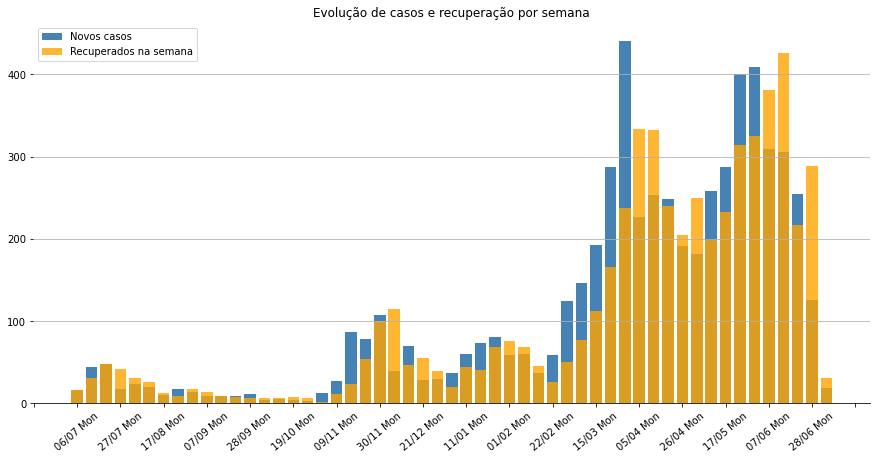

In [12]:
loc = plticker.MultipleLocator(base=3.0)

labels = [date.strftime("%d/%m %a") for date in df.index]

plt.figure(figsize=(15, 7))
ax = plt.subplot()
# plt.bar(labels, df['DESCARTADOS_DIA'], color='green', alpha=0.8, label="Casos descartados na semana")
plt.bar(labels, df['NOVOS_CASOS'], color='steelblue', label='Novos casos')
plt.bar(labels, df['RECUPERADOS_DIA'], color='orange', alpha=0.8, label='Recuperados na semana')
ax.yaxis.grid(True)
ax.xaxis.set_major_locator(loc)
ax.set(title="Evolução de casos e recuperação por semana")
plt.legend()
plt.xticks(rotation=40)
sns.despine(left=True)

In [13]:
today = datetime.now()

today.strftime("%d/%m/%y %a")

'30/06/21 Wed'

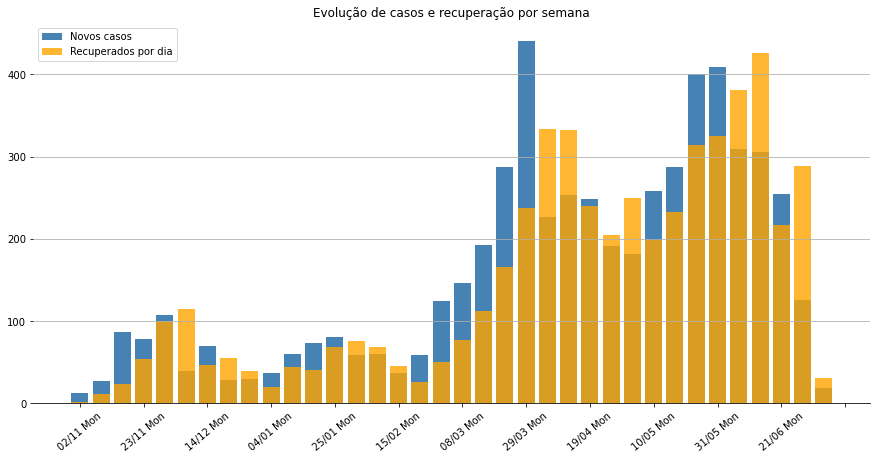

In [14]:
df2 = df['2020-11':]

loc = plticker.MultipleLocator(base=3.0)

labels = [date.strftime("%d/%m %a") for date in df2.index]

plt.figure(figsize=(15, 7))
ax = plt.subplot()
plt.bar(labels, df2['NOVOS_CASOS'], color='steelblue', label='Novos casos')
plt.bar(labels, df2['RECUPERADOS_DIA'], color='orange', alpha=0.8, label='Recuperados por dia')
ax.yaxis.grid(True)
ax.xaxis.set_major_locator(loc)
ax.set(title="Evolução de casos e recuperação por semana")
plt.legend()
plt.xticks(rotation=40)
sns.despine(left=True)